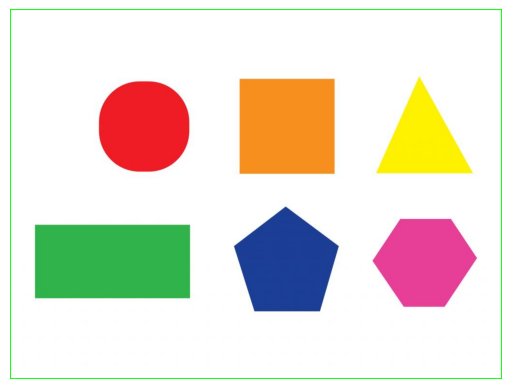

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    shapes = []
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # If the shape has 3 vertices, it's a triangle
        if len(approx) == 3:
            shapes.append((contour, "Triangle"))
        # If the shape has 4 vertices, it's either a square or a rectangle
        elif len(approx) == 4:
            # Calculate aspect ratio
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h

            # If aspect ratio is close to 1, it's a square, otherwise a rectangle
            shape_type = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
            shapes.append((contour, shape_type))
        # If the shape has more than 8 vertices, it's likely a circle
        else:
            shapes.append((contour, "Circle"))

    return shapes, image

if __name__ == "__main__":
    image_path = "shape.jpg"  # Path to your image
    detected_shapes, image = detect_shapes(image_path)
    for i, (contour, shape) in enumerate(detected_shapes):
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw the contour
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Draw the name of the shape
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        # Draw a mark at the centroid
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
